In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Cleaned_dataset.csv')

data

,N,P,K,temperature,humidity,ph,rainfall,label
0,1.068797,-0.341922,0.197128,-0.935587,0.472666,0.043302,1.973430,20
1,0.933329,0.167308,0.111858,-0.759646,0.397051,0.734873,2.186623,20
2,0.255986,0.071827,0.239763,-0.515898,0.486954,1.771510,2.186623,20
3,0.635298,-0.564710,0.069223,0.172807,0.389805,0.660308,2.186623,20
4,0.743673,-0.341922,0.154493,-1.083647,0.454792,1.497868,2.186623,20
...,...,...,...,...,...,...,...,...
2195,1.529390,-0.596536,-0.271855,0.228814,-0.227709,0.401395,1.481563,5
2196,1.312641,-1.201247,-0.485030,0.355720,-0.666947,-0.494413,0.507059,5
2197,1.827421,-0.628363,-0.357125,-0.293218,-0.191235,-0.138120,1.394538,5
2198,1.800327,-0.660190,-0.186586,0.129612,-0.869518,0.373904,0.492411,5


* ### Splitting into X and y

In [5]:
X = data.drop('label', axis=1)
y = data['label']

* ### Train-Test-Split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Train Test Split successful!")
print(X_train.shape, X_test.shape)

Train Test Split successful!
(1760, 7) (440, 7)


* ### Important ML Model libraries import

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [12]:
models = {
    'Logistic Regression' : LogisticRegression(max_iter=1000),
    'SVC' : SVC(),
    'Random Forest' : RandomForestClassifier(),
    'Naive Bayes' : GaussianNB(),
    'XGBoost' : XGBClassifier()
}

In [24]:
accuracy_dict = {}

for name, model in models.items():
    # Model Training
    model.fit(X_train, y_train)

    pred = model.predict(X_test)

    # Accuracy 
    accuracy = accuracy_score(y_test, pred) * 100

    # Storing in dictionary
    accuracy_dict[name] = accuracy
    print('-----------------------------------------------------')
    print(f"Model Trained\nAccuracy of {name} : {accuracy:.2f}%")

-----------------------------------------------------
Model Trained
Accuracy of Logistic Regression : 96.36%
-----------------------------------------------------
Model Trained
Accuracy of SVC : 97.95%
-----------------------------------------------------
Model Trained
Accuracy of Random Forest : 99.32%
-----------------------------------------------------
Model Trained
Accuracy of Naive Bayes : 99.55%
-----------------------------------------------------
Model Trained
Accuracy of XGBoost : 98.86%


In [25]:
accuracy_dict

{'Logistic Regression': 96.36363636363636,
 'SVC': 97.95454545454545,
 'Random Forest': 99.31818181818181,
 'Naive Bayes': 99.54545454545455,
 'XGBoost': 98.86363636363636}

In [31]:
accuracy_df = pd.DataFrame(list(accuracy_dict.items()), columns=['Model Name', 'Accuracy'])

accuracy_df

,Model Name,Accuracy
0,Logistic Regression,96.363636
1,SVC,97.954545
2,Random Forest,99.318182
3,Naive Bayes,99.545455
4,XGBoost,98.863636


* ### Plotting Accuracy

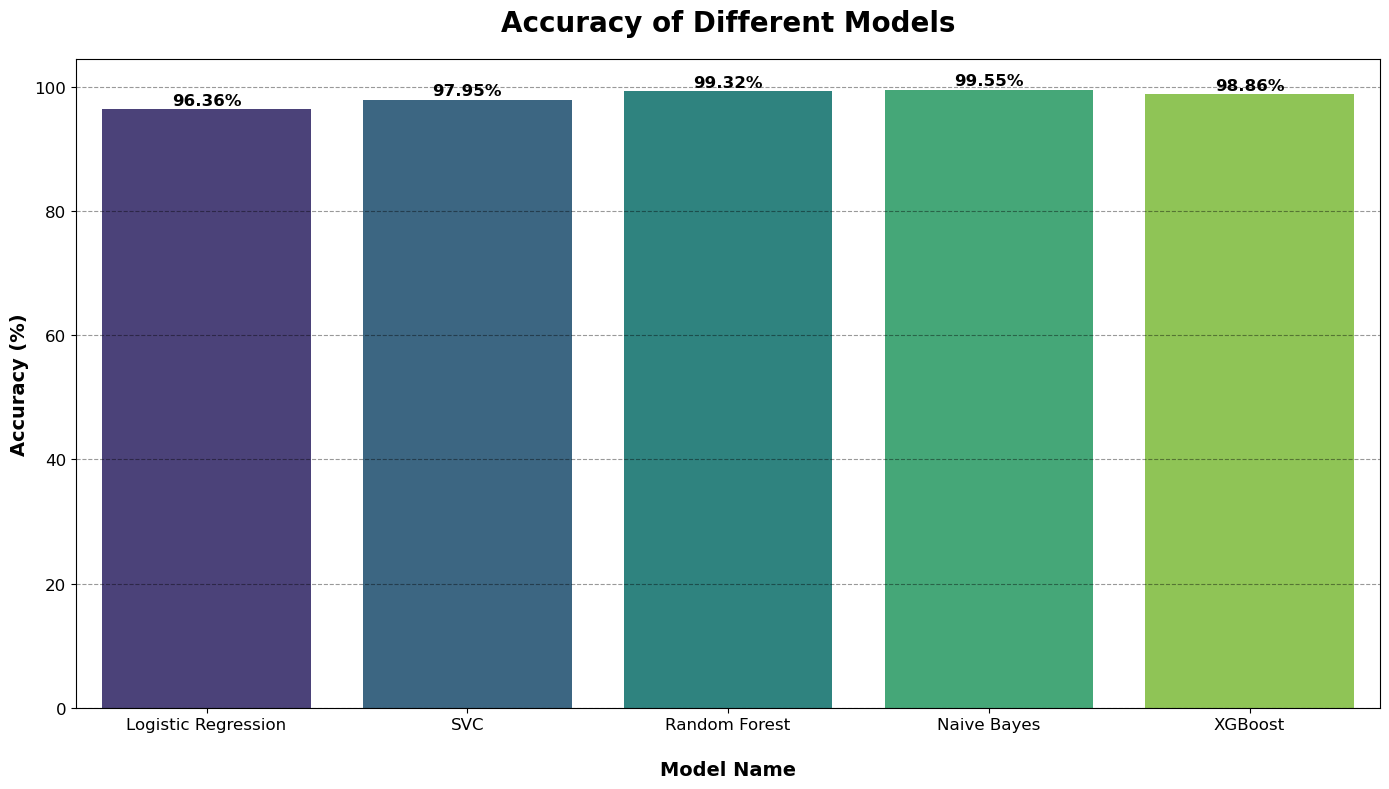

In [51]:
plt.figure(figsize=(14, 8))
# Barplot
sns.barplot(
    x='Model Name',
    y='Accuracy',
    data=accuracy_df,
    palette='viridis'
)

# Add value labels on top of each bar
for i, row in accuracy_df.iterrows():
    plt.text(
        x=i,
        y=row['Accuracy'] + 0.7,
        s=f"{row['Accuracy']:.2f}%",
        ha='center',
        fontsize=12,
        fontweight='bold',
        color='black'
    )

# Styling
plt.title('Accuracy of Different Models', fontsize=20, fontweight='bold', pad=20)
plt.xlabel('\nModel Name', fontsize=14, fontweight='bold')
plt.ylabel('Accuracy (%)', fontsize=14, fontweight='bold')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', color='black', alpha=0.4)
plt.tight_layout()
plt.show()


* ### Checking a confusion matrix

In [61]:
from sklearn.metrics import classification_report, confusion_matrix

naive_bayes = GaussianNB()

naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)

print(f"Classification report ->\n{classification_report(y_pred, y_test)}")
print(f"Confusion matrix ->\n{confusion_matrix(y_pred, y_test)}")

Classification report ->
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       1.00      0.92      0.96        25
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
          16       1.00      1.00      1.00        14
  

* ### Save Models as .pkl

In [52]:
import joblib
import os

# Create a folder to save models
save_dir = 'Saved_Models'
os.makedirs(save_dir, exist_ok=True)

# Save each model using joblib
for name, model in models.items():
    model_path = os.path.join(save_dir, f'{name}.pkl')
    joblib.dump(model, model_path)
    print(f"✅ {name} saved successfully at: {model_path}")


✅ Logistic Regression saved successfully at: Saved_Models\Logistic Regression.pkl
✅ SVC saved successfully at: Saved_Models\SVC.pkl
✅ Random Forest saved successfully at: Saved_Models\Random Forest.pkl
✅ Naive Bayes saved successfully at: Saved_Models\Naive Bayes.pkl
✅ XGBoost saved successfully at: Saved_Models\XGBoost.pkl
